In [1]:
import json
import requests
from bs4 import BeautifulSoup

# Load Login Credentials

In [11]:
with open('credentials.json', 'r') as f:
    credentials = json.load(f)
    username = credentials['USERNAME']
    password = credentials['PASSWORD']
    
URL = 'https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699'
headers={"User-Agent":"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.125 Safari/537.36"}

# Start Session and Login

In [13]:
print("Getting:", URL)
s=requests.Session()
s.headers.update(headers)

r=s.get(URL)
soup=BeautifulSoup(r.content)

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data={"__VIEWSTATE":VIEWSTATE,
"__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
"__EVENTVALIDATION":EVENTVALIDATION,
"ctl00$PageContent$LoginName":username,
"ctl00$PageContent$PassWord":password,
"ctl00$PageContent$loginButton":"Log In"}

r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/Login.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


# Get a history of visits

## Navigate to Usage Page

In [14]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$UsageButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open Printable View of Usage

In [15]:
#First, trigger the ability to GET

VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBox":"",
        "ctl00$PageContent$toDateBox:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$usePrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [16]:
checkins = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/MemberUsageReport.aspx")

with open('Checkins.html', 'w') as w:
    w.write(checkins.text)

# Get a history of payments

## Naviate to the payment page

In [17]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageSubNavBar$ARHistoryButton",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Open printable view of Payments

In [18]:
VIEWSTATE=soup.find(id="__VIEWSTATE")['value']
VIEWSTATEGENERATOR=soup.find(id="__VIEWSTATEGENERATOR")['value']
EVENTVALIDATION=soup.find(id="__EVENTVALIDATION")['value']

data = {"__VIEWSTATE":VIEWSTATE,
        "__VIEWSTATEGENERATOR":VIEWSTATEGENERATOR,
        "__VIEWSTATEENCRYPTED":"",
        "__EVENTVALIDATION":EVENTVALIDATION,
        "ctl00$IsLoggedIn":1,
        "ctl00$PageContent$fromDateBoxAR":"",
        "ctl00$PageContent$toDateBoxAR:":"",
        "ctl00$PageContent$amtToPayPopupBox":0,
        "__EVENTTARGET":"ctl00$PageContent$ARPrintableLink",
        "__EVENTARGUMENT":""
       }

print("Getting:", URL)
r = s.post(URL, data)
URL = r.url
soup = BeautifulSoup(r.content)
print("Returned:",URL)

Getting: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699
Returned: https://www.mytwinoaks.com/MemberPortal/ClubServices/memDashboard.aspx?clubid=1699


## Record Data

In [19]:
payments = s.get("https://www.mytwinoaks.com/MemberPortal/ClubServices/ARHistoryReport.aspx")

with open('Payments.html', 'w') as w:
    w.write(payments.text)

# Scrape Downloaded Data

In [2]:
import datetime
import pandas as pd
import numpy as np
import calendar

In [3]:
#Checkins
with open('Checkins.html', 'r') as f:
    soup = BeautifulSoup(f)

df = {'club':[],'time':[]}
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==5]:
    club, _, time, _, alerts = [rec.text for rec in record.find_all('span')]
    df['club'].append(club)
    df['time'].append(datetime.datetime.strptime(time, '%m/%d/%Y %I:%M:%S %p'))
    
df = pd.DataFrame(df)
df['club'] = pd.Categorical(df['club'])

#More reasonable format
data_visits = pd.DataFrame()
data_visits['club'] = pd.Categorical(df['club'])
data_visits['year'] = df['time'].dt.year
data_visits['month'] = df['time'].dt.month
data_visits['day'] = df['time'].dt.day
data_visits['weekday'] = df['time'].dt.weekday
data_visits['hour'] = df['time'].dt.hour
data_visits['dt'] = df['time']

data_visits = data_visits.sort('dt').reset_index(drop=True) #Sort from earliest and re-index

data_visits.head()

,club,year,month,day,weekday,hour,dt
0,1699 - The North Club,2009,10,10,5,14,2009-10-10 14:30:45
1,1699 - The North Club,2009,10,12,0,18,2009-10-12 18:07:58
2,1699 - The North Club,2009,10,13,1,18,2009-10-13 18:26:28
3,1699 - The North Club,2009,10,17,5,11,2009-10-17 11:35:13
4,1699 - The North Club,2009,10,21,2,17,2009-10-21 17:59:35


In [4]:
#Payments
with open('Payments.html', 'r') as f:
    soup = BeautifulSoup(f)

df = {'date':[],'debit':[]}
for record in [rec for rec in soup.find_all('tr') if len(rec.find_all('span'))==11]:
    info = [rec.text for rec in record.find_all('span')]
    date = info[0]
    debit = info[6]
    df['date'].append(datetime.datetime.strptime(date, '%m/%d/%Y'))
    df['debit'].append(float(debit))
    
df = pd.DataFrame(df)

#Reformat
data_payments = pd.DataFrame()
data_payments['debit'] = df['debit']
data_payments['year'] = df['date'].dt.year
data_payments['month'] = df['date'].dt.month
data_payments['day'] = df['date'].dt.day
data_payments['date'] = df['date']

data_payments = data_payments.sort('date').reset_index(drop=True) #Sort from earliest and re-index

data_payments.head()

,debit,year,month,day,date
0,25,2009,10,10,2009-10-10
1,21,2009,10,10,2009-10-10
2,29,2009,11,1,2009-11-01
3,29,2009,12,1,2009-12-01
4,29,2010,1,1,2010-01-01


# Fun with data!

In [5]:
total_payments = data_payments['debit'].sum()
total_visits = len(data_visits)
print('Total Payments:', '${0:,.2f}'.format(total_payments))
print('Total Visits:', '{0:,}'.format(total_visits))
print('Average cost per visit:', "${0:,.2f}".format(total_payments/total_visits))

Total Payments: $1,960.00
Total Visits: 961
Average cost per visit: $2.04


In [6]:
print("Most Visits Per:\n"+'-'*20)
maxyear = data_visits.groupby('year').agg('count')['club'] #just pick one of the columns
print("Year:\t{} with {}".format(maxyear.idxmax(), maxyear.max()))
maxmonth = data_visits.groupby(['month', 'year']).agg('count')['club'] #just pick one of the columns
print("Month:\t{} of {} with {}".format(calendar.month_name[maxmonth.idxmax()[0]], maxmonth.idxmax()[1], maxmonth.max()))
maxweekday = data_visits.groupby('weekday').agg('count')['club']
print("Weekday:\t{} with {}".format(calendar.day_abbr[maxweekday.idxmax()], maxweekday.max()))

Most Visits Per:
--------------------
Year:	2011 with 228
Month:	February of 2011 with 31
Weekday:	Tue with 167


In [7]:
#Longest Break
timediff = data_visits['dt'].shift(-1)-data_visits['dt'] #time until next visit
maxbreak = timediff.max()
start = data_visits.loc[timediff.idxmax()]['dt'].strftime("%B %d, %Y @ %I:%M %p")
end = data_visits.loc[timediff.idxmax()+1]['dt'].strftime("%B %d, %Y @ %I:%M %p")
print("Longest break was from {} to {}".format(start, end))
print("This was {} Days, {} Hours, {} Min, and {} Sec".format(maxbreak.days, maxbreak.seconds//3600,
                                                              maxbreak.seconds//60%60, maxbreak.seconds%60))

Longest break was from August 29, 2012 @ 06:57 PM to September 16, 2012 @ 10:58 AM
This was 17 Days, 16 Hours, 0 Min, and 54 Sec


In [8]:
#Longest Streak
dates = data_visits['dt'].apply(lambda dt: dt.date())
daydiff = dates.shift(-1)-dates #days until next visit

#Select only rows with consecutive dates
consecutive =daydiff==pd.Timedelta('1 days')
print(consecutive.head())
#Find longest stretch of consecutive index numbers

0    False
1     True
2    False
3    False
4    False
Name: dt, dtype: bool


# Fun with plots!

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
%matplotlib inline

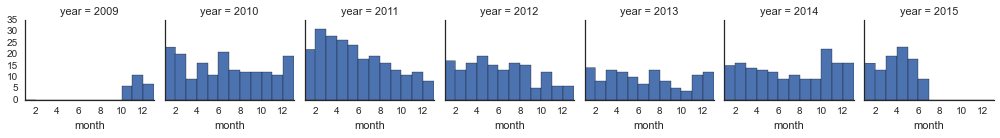

In [11]:
#Month by Year
g = sns.FacetGrid(data_visits, col="year", size=2, xlim=(1,13))
g.map(plt.hist, "month", bins=range(1,14));

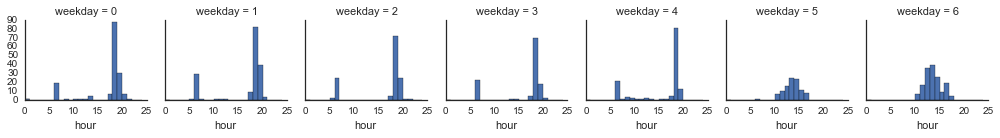

In [12]:
#Time by day of the week
g = sns.FacetGrid(data_visits, col="weekday", size=2)
g.map(plt.hist, "hour", bins=range(0,25));

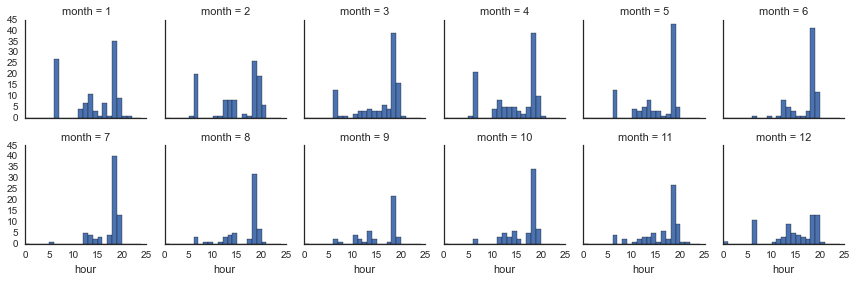

In [13]:
#Time by month
g = sns.FacetGrid(data_visits, col="month", col_wrap=6, size=2)
g.map(plt.hist, "hour", bins=range(0,25));